# Predicting Sales Prices

 ## Dataset Attributes

 The dataset contains information about houses in Ames, Iowa. The data was collected by the Ames City Assessor’s Office describing 2930 property sales which occurred in Ames, Iowa between 2006 and 2010. 

 The dataset contains the following variables:
* **Year_Built:** year that the house was originally constructed
* **Year_Remod_Add:** year that the house was last remodelled
* **Total_Bsmt_SF:** total size of basement area in square feet
* **First_Flr_SF:** size of the first floor in square feet
* **Second_Flr_SF:** size of the second floor in square feet
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Full_Bath:** number of full above grade bathrooms in the house
* **Half_Bath:** number of half above grade bathrooms in the house
* **Bedroom_AbvGr:** number of above grade bedrooms (does not include basement bedrooms)
* **Kitchen_AbvGr:** number of above grade kitchens
* **TotRms_AbvGrd:** total number of above grade rooms (does not include bathrooms)
* **Fireplaces:** number of fireplaces in the house
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars

I intially built a model with a 63% R2 Score by including the 'Gr_Liv_Area' and 'Garage_Area` variables. I then further built a Multiple Linear Regression model with an R2 Score of 80%, by including all variables, to predict house sale prices in Ames.


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the sales prices based on the 'Gr_Liv_Area' and 'Garage_Area` variables.


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

#### Exploratory Data Analysis

This section will give a broad overview of the dataset. Including the amount of columns in the dataset, the data types for each column, where null values are present and summary statistics.

In [2]:
df = pd.read_csv('ames.csv')
df.head()

,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
0,1960,1960,1080,1656,0,1656,1,0,3,1,7,2,528,215000
1,1961,1961,882,896,0,896,1,0,2,1,5,0,730,105000
2,1958,1958,1329,1329,0,1329,1,1,3,1,6,0,312,172000
3,1968,1968,2110,2110,0,2110,2,1,3,1,8,2,522,244000
4,1997,1998,928,928,701,1629,2,1,3,1,6,1,482,189900


All variables are in the correct data type, with no columns containing null values as seen below:

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Year_Built      2930 non-null   int64
 1   Year_Remod_Add  2930 non-null   int64
 2   Total_Bsmt_SF   2930 non-null   int64
 3   First_Flr_SF    2930 non-null   int64
 4   Second_Flr_SF   2930 non-null   int64
 5   Gr_Liv_Area     2930 non-null   int64
 6   Full_Bath       2930 non-null   int64
 7   Half_Bath       2930 non-null   int64
 8   Bedroom_AbvGr   2930 non-null   int64
 9   Kitchen_AbvGr   2930 non-null   int64
 10  TotRms_AbvGrd   2930 non-null   int64
 11  Fireplaces      2930 non-null   int64
 12  Garage_Area     2930 non-null   int64
 13  Sale_Price      2930 non-null   int64
dtypes: int64(14)
memory usage: 320.6 KB


,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1971.356314,1984.266553,1051.255631,1159.557679,335.455973,1499.690444,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,472.658362,180796.060068
std,30.245361,20.860286,440.968018,391.890885,428.395715,505.508887,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,215.187196,79886.692357
min,1872.000000,1950.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,12789.000000
25%,1954.000000,1965.000000,793.000000,876.250000,0.000000,1126.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,320.000000,129500.000000
50%,1973.000000,1993.000000,990.000000,1084.000000,0.000000,1442.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,480.000000,160000.000000
75%,2001.000000,2004.000000,1301.500000,1384.000000,703.750000,1742.750000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,576.000000,213500.000000
max,2010.000000,2010.000000,6110.000000,5095.000000,2065.000000,5642.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,1488.000000,755000.000000


In [4]:
# Inspect how many records have 0 values.
(df[['Gr_Liv_Area', 'Garage_Area']] == 0).sum()

Gr_Liv_Area      0
Garage_Area    158
dtype: int64

Continuous values are easily visualised in the pairplot matrix below, then I will look at correlation between Sales price and the categorical data using boxplots.

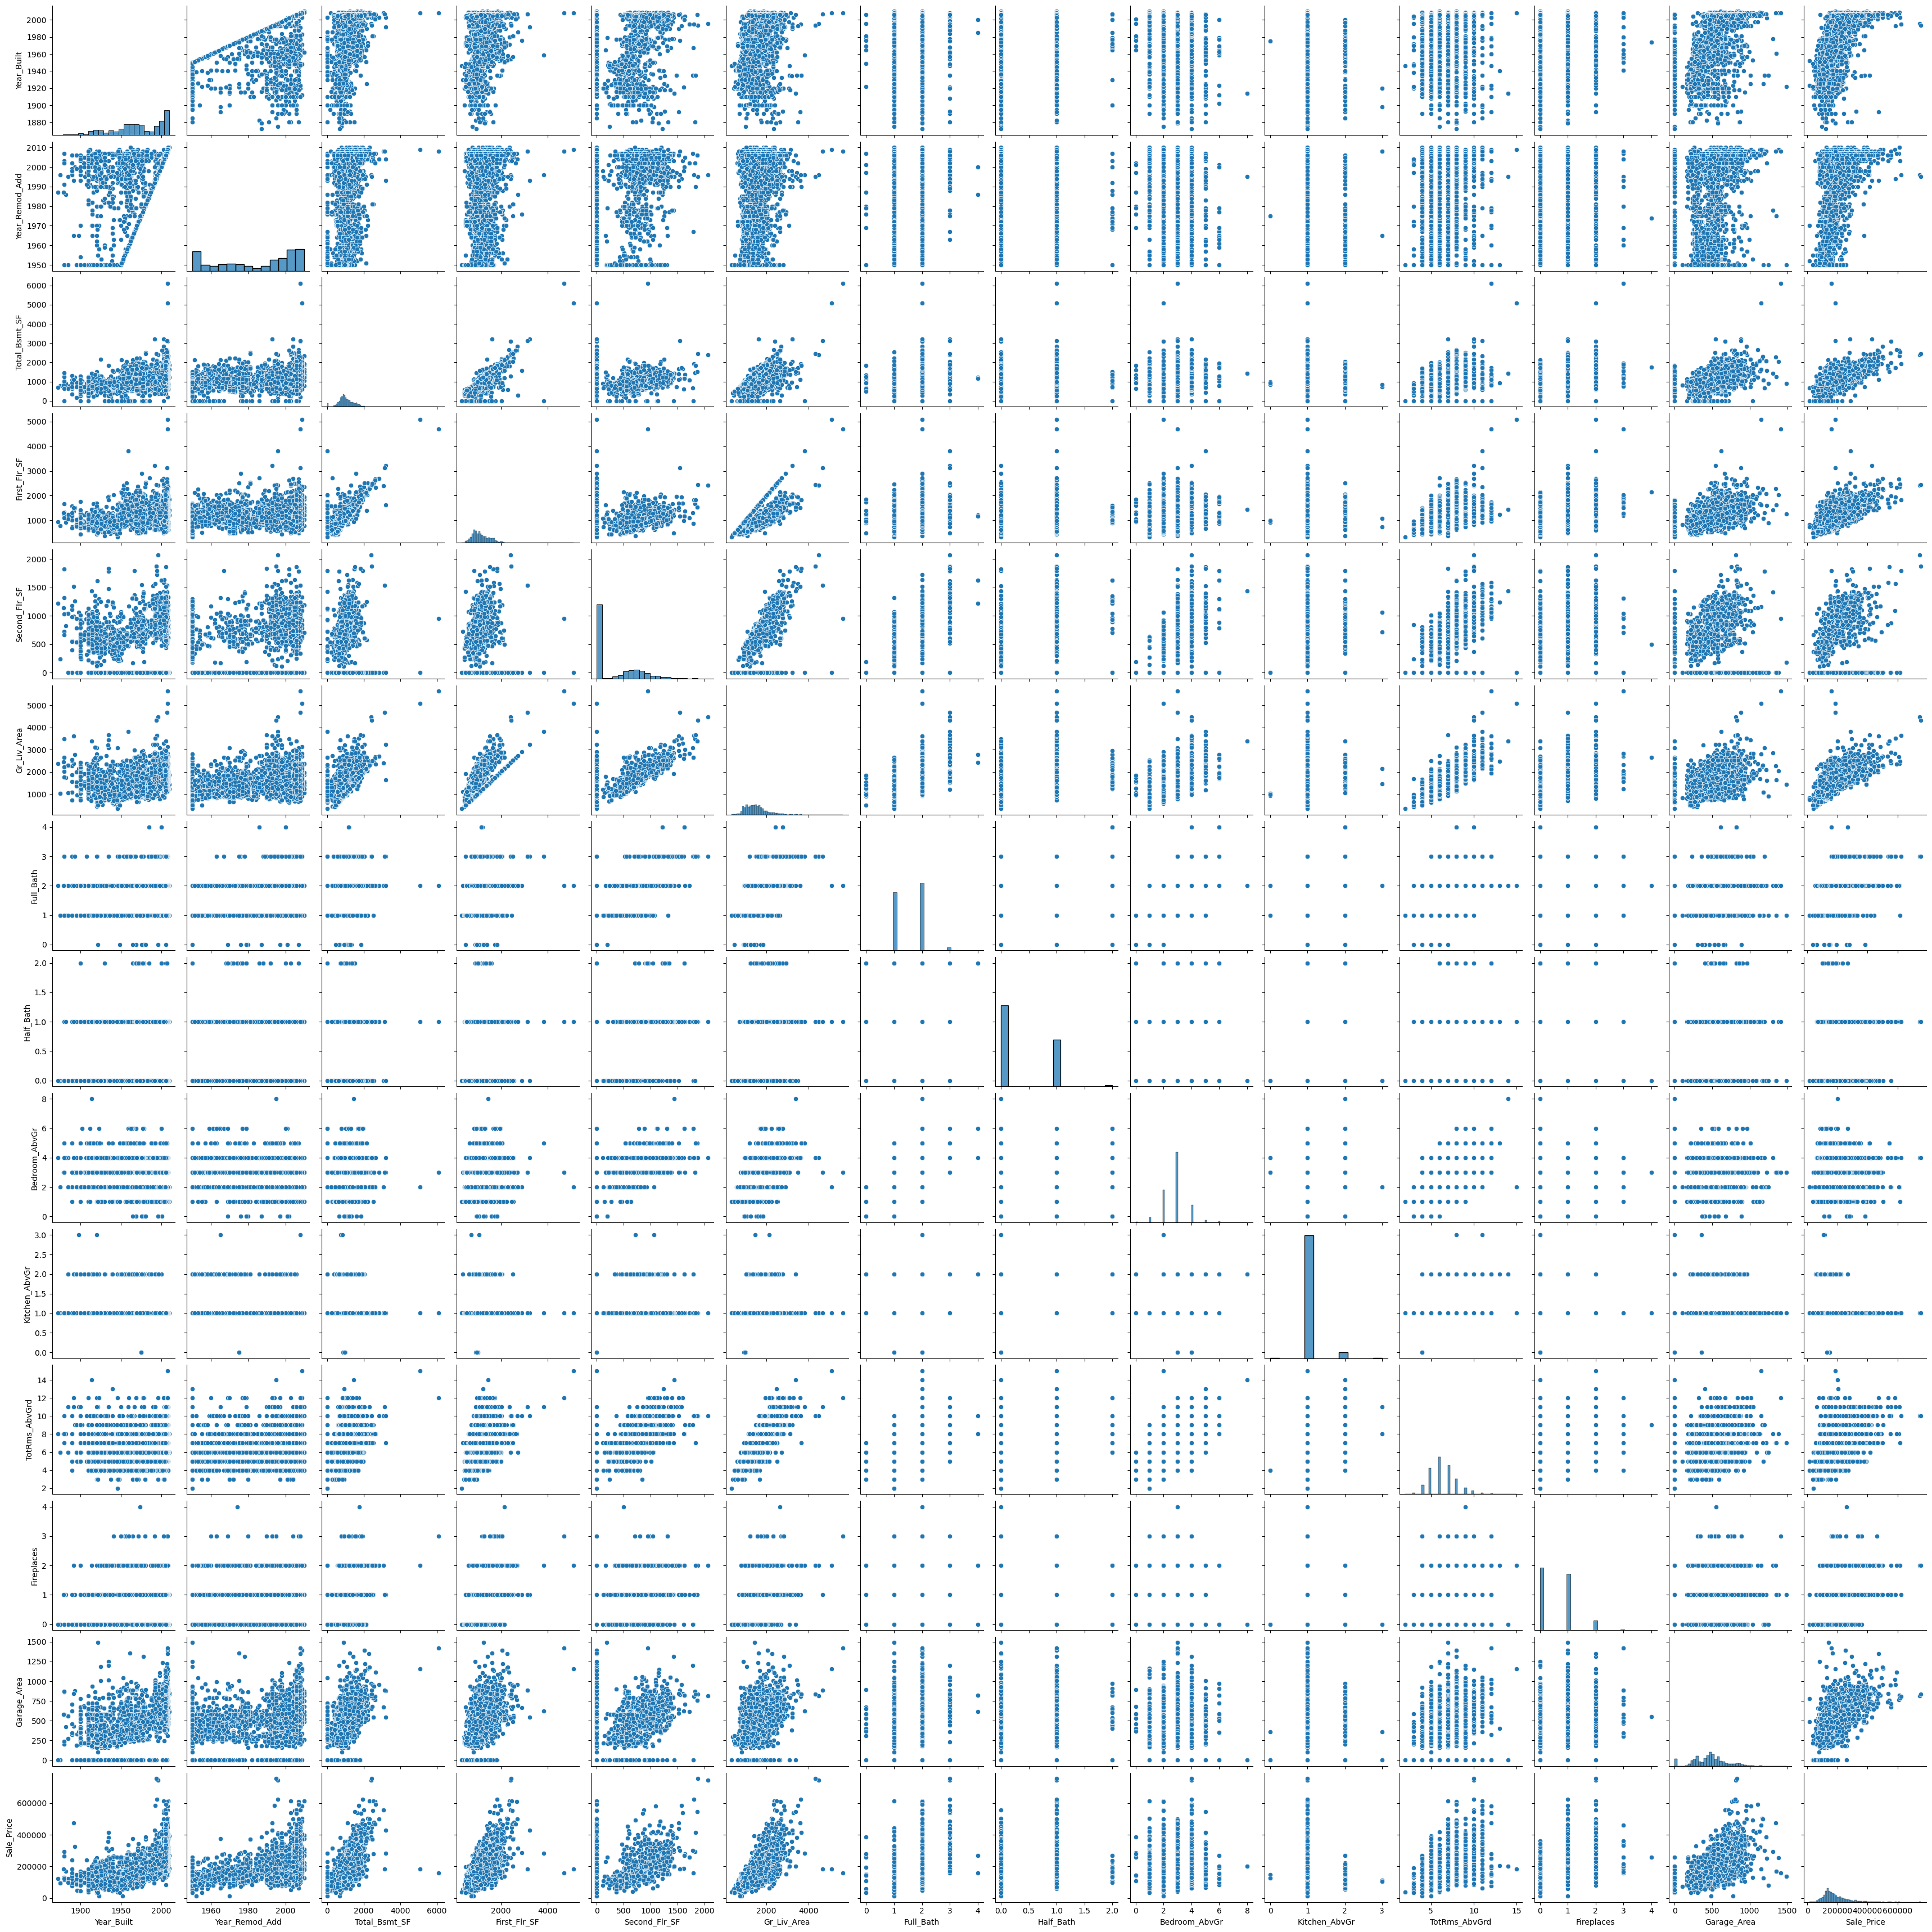

In [5]:
sns.pairplot(data=df)

#### Seen below, for each categorical variable, there is an increase in sale price as the general number or bathrooms, rooms above ground, or fireplaces increase.

<Figure size 640x480 with 0 Axes>

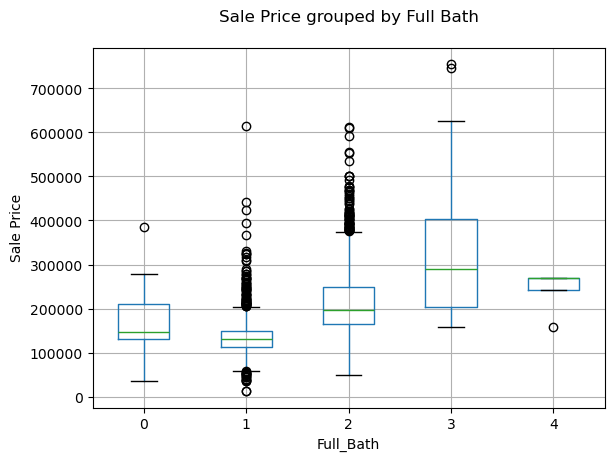

In [6]:
# Plotting 3 seperate plots for the 3 categories.
plt.figure()
df.boxplot(column='Sale_Price',by='Full_Bath')
plt.ylabel('Sale Price')
plt.title(" ")
plt.suptitle("Sale Price grouped by Full Bath")
plt.show()

<Figure size 640x480 with 0 Axes>

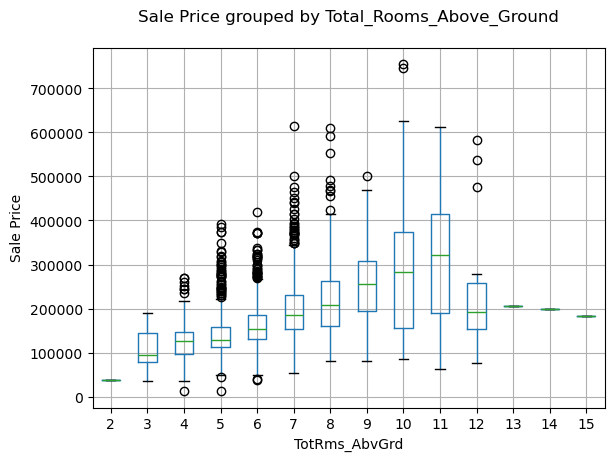

In [7]:
plt.figure()
df.boxplot(column='Sale_Price',by='TotRms_AbvGrd')
plt.ylabel('Sale Price')
plt.title(" ")
plt.suptitle("Sale Price grouped by Total_Rooms_Above_Ground")
plt.show()

<Figure size 640x480 with 0 Axes>

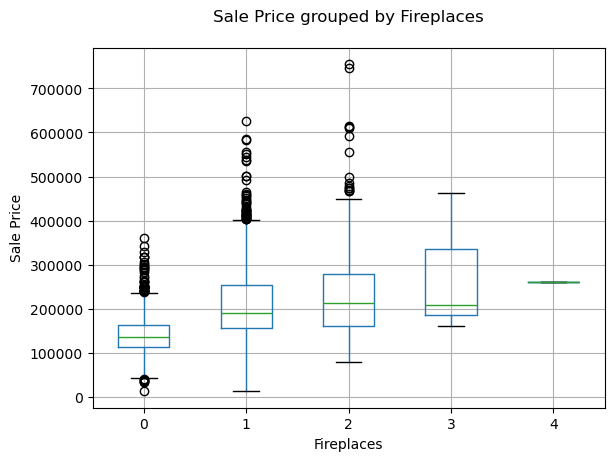

In [8]:
plt.figure()
df.boxplot(column='Sale_Price',by='Fireplaces')
plt.ylabel('Sale Price')
plt.title(" ")
plt.suptitle("Sale Price grouped by Fireplaces")
plt.show()

#### I used a Heatmap to better visualise the correlations and to analyse the relationships of all variables.

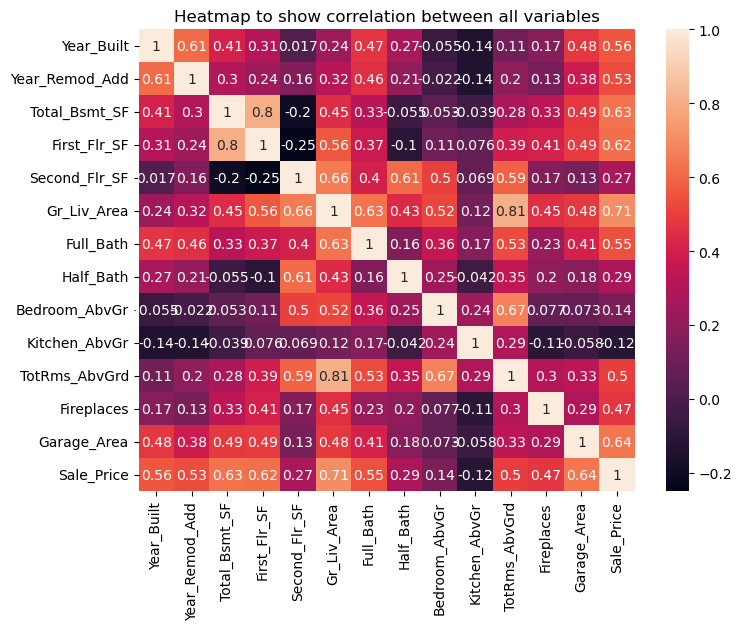

In [9]:
correlations = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlations,annot=True)
plt.title('Heatmap to show correlation between all variables')
plt.show()

#### Model Performance

For this task, 'Gr_Liv_Area' and 'Garage_Area' will be used as independent variables. The dependant variable (y) is split and in the correct 1-D shape as well as the 2-D independant variables (X).

In [10]:
df_new = df[['Gr_Liv_Area','Garage_Area','Sale_Price']]
# 2-D matrix for dependant variables.
X = df_new.drop('Sale_Price',axis=1)
# 1-D array for target vector
y = df_new['Sale_Price']
# Confirm shape of variables.
print("Shape of X:\n",X.shape)
print("Shape of y:\n",y.shape)

Shape of X:
 (2930, 2)
Shape of y:
 (2930,)


Normal distributions for all variables. Standard scaling to be investigated.

There is a positive correlation between these independent variables and the dependent variable, as seen below:

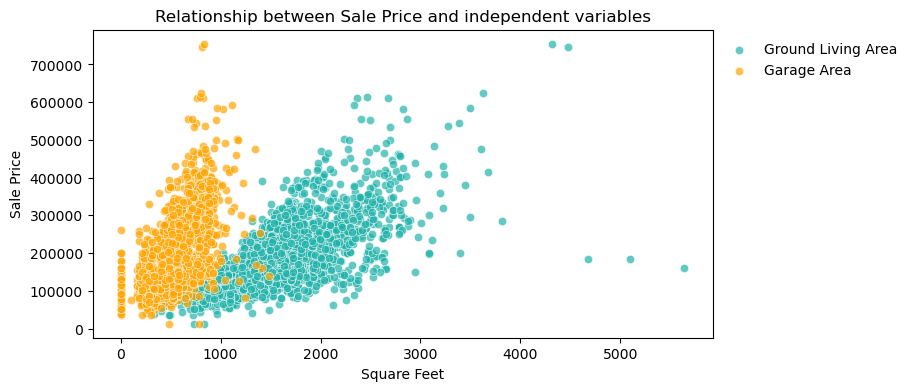

In [23]:
# Improved visual of the independant variables against the sale price.
plt.figure(figsize=(8,4))
sns.scatterplot(data=df,x='Gr_Liv_Area',y='Sale_Price',color='lightseagreen',alpha=0.7,label='Ground Living Area')
plt.xlabel('Square Feet')
plt.ylabel('Sale Price')
sns.scatterplot(data=df,x='Garage_Area',y='Sale_Price',color='orange',alpha=0.7,label='Garage Area')
plt.title('Relationship between Sale Price and independent variables')
plt.legend(loc='upper left',frameon=False,bbox_to_anchor=(1, 1))
plt.show()

In [13]:
# Create a training and test set with a 75:25 split ratio
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state=42)

Standard scaling fitted and will be compared to unscaled training data predictions.

In [14]:
# Fit Standard Scaler to training data and evaluate result.
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [15]:
scaler_model = LinearRegression()
model_standard = scaler_model.fit(X_train_scaler, y_train)
prediction_standard = scaler_model.predict(X_test_scaler)

In [16]:
r2_scaler = r2_score(y_test, prediction_standard)
print("r2 score after standardising data: \n",round(r2_scaler,4))

r2 score after standardising data: 
 0.6386


Multiple linear regression model built using 'Gr_Liv_Area' and 'Garage_Area' independant variables.

In [17]:
# Instantiate model and fit
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [18]:
# Generate predictions for the test set and I have displayed the first 10 predicitons of this model
y_pred = model.predict(X_test)
y_pred[:10]

array([158224.09430889, 113256.67578876, 217552.81911301,  72846.49160079,
        94782.71287234, 159556.51682943, 147050.44791809, 171621.4840609 ,
        81392.38908909, 283579.83964666])

#### Model Evaluation

Inspection of model performance with mean squared error (MSE), root mean squared error (RMSE) and r2 score. 
In the case of RMSE, this will indicate by how much the model will be off per prediction.
In the case of R2 score, this will indicate how much of the variance is explained by the model and how much is not.

In [19]:
# Evaluate the model
MSE = mean_squared_error(y_test,y_pred)
r2_score = round(model.score(X_test, y_test), 4)
print('Model MSE: ',MSE)
print('Model RMSE: ', np.sqrt(MSE))
print('Model r2 Score: ',r2_score)

Model MSE:  2634371879.6902103
Model RMSE:  51326.13252223676
Model r2 Score:  0.6386


In [20]:
# Print the model intercept and coefficients
print("Model intercept:\t",model.intercept_)
print("Model coefficients:\t",model.coef_)

Model intercept:	 -5059.448195610486
Model coefficients:	 [ 78.69286848 141.14571761]


Error plots are generated for each variable below.

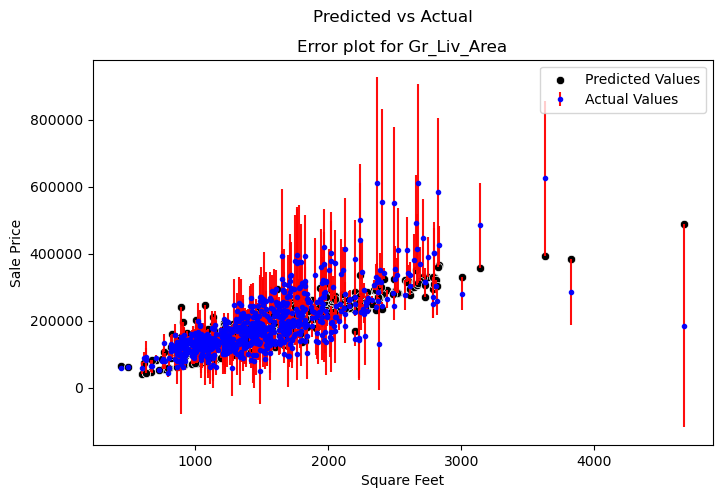

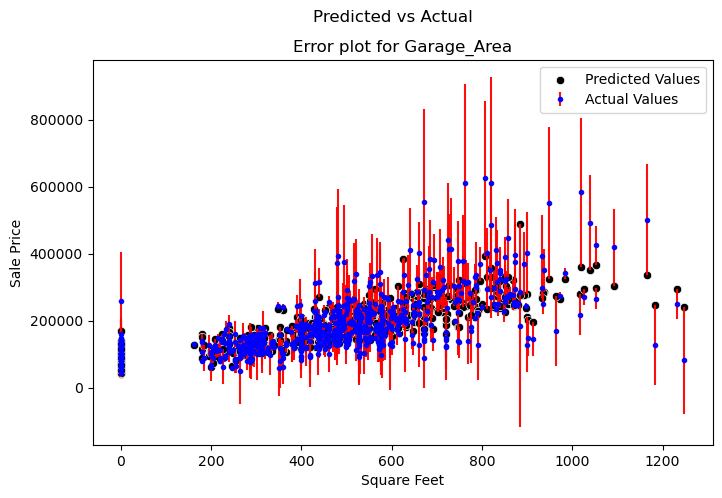

In [26]:
# Generate error plots
error = np.abs(y_test-y_pred)
plt.figure(figsize=(8,5))
plt.errorbar(X_test['Gr_Liv_Area'],y_test,yerr=error,
             fmt='o',color='blue',
             ecolor='red',label='Actual Values',
             alpha=0.95,markersize=3)
sns.scatterplot(x=X_test['Gr_Liv_Area'],y=y_pred,
                color='black',label='Predicted Values')
plt.ylabel('Sale Price')
plt.xlabel('Square Feet')
plt.title('Error plot for Gr_Liv_Area')
plt.suptitle('Predicted vs Actual')
plt.show()
plt.figure(figsize=(8,5))
plt.errorbar(X_test['Garage_Area'],y_test,yerr=error,
             fmt='o',color='blue',
             ecolor='red',label='Actual Values',
             alpha=0.95,markersize=3)
sns.scatterplot(x=X_test['Garage_Area'],y=y_pred,
                color='black',label='Predicted Values')
plt.ylabel('Sale Price')
plt.xlabel('Square Feet')
plt.title('Error plot for Garage_Area')
plt.suptitle('Predicted vs Actual')
plt.show()

#### Coefficient Interpretation

In [27]:
# Print the coefficients
print("Model coefficients:\t",model.coef_)

Model coefficients:	 [ 78.69286848 141.14571761]


**Interpret coefficients in the context of the prediction:**
The coefficients for Ground Living Area and Garage Size would fit into the regression formula as
y = 78.69286848['Gr\_Liv\_Area'] + 141.14571761['Garage\_Area'] - 5059.448195610341.
This means that if all x variables are 0, the sale price in theory (in dollars) would be (-5059.44), although in reality this does not work.
Also, if all other x variables are constant, the sale price would increase by \$78.69 for every 1 square foot that the Ground Living Area increases. The same logic will work for the 141.14571761['Garage Area'].

**Summarise findings**
##### EDA
No empty cells are found in this dataset, however there are a number of cells with 0 values.
It seems when observing a 0 in a sample, it means that property did not contain that specific feature,therefore no action is required to those entries.
158 properties out of 2930 do not have garages. I will keep these entries as they contribute to the sale price.
There are columns with both continuous as well as categorical values in this dataset. 
Of the categorical data, Full bath, Total rooms above ground and Fireplaces has the largest relationship to Sale price, as seen in the boxplots.
Gr_Liv_Area (0.71) and Garage_Area (0.64) have the highest correlations to Sale Price.
A closer look at the sale price and independant variables with a pairplot, shows a fairly normal distribution, with slight tales on the right side of each distribution.
##### Model Performance
After scaling, r2 scores were identical (0.6386) to unscaled data. Therefore, unscaled data will be used for predictions.
The RMSE of the model is 51326.133. This means that for every prediction, the model will be off on average by about $51 000.
The r2 score for the model is 0.6386. This means that 63% of variance can be explained by the model. This is a fair score for predicting house sale prices.
See interpretation of intercepts and coefficients above. Note, the above explanation is for when using unscaled data to determine sale prices.
Overall I'm of the opinion that a satisfactory model was built to predict sale prices, with a r2 score of 63%. Further investigation could be done into whether other factors not found in this dataset could improve this score.
#### Notable Observations
##### Beyond the brief of this Capstone Project, I have decided to include the rest of the features into my model in order to attempt to improve the performance of the model.

I will make a copy if the original dataset for me to use to explore adding more features.

In [28]:
df2 = df.copy()

In [29]:
X = df2.drop('Sale_Price',axis=1)
# 1-D array for target vector
y = df2['Sale_Price']
# Confirm shape of variables.
print("Shape of X:\n",X.shape)
print("Shape of y:\n",y.shape)

Shape of X:
 (2930, 13)
Shape of y:
 (2930,)


In [45]:
# Create a training and test set with a 75:25 split ratio
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state=42)

In [46]:
# Instantiate model and fit
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [47]:
y_pred = model.predict(X_test)

In [48]:
# Print the model intercept and coefficients
print("Model intercept:\t",model.intercept_)
print("Model coefficients:\t",model.coef_)

Model intercept:	 -1897466.3262358238
Model coefficients:	 [ 5.17881857e+02  4.73387790e+02  3.33260139e+01  5.20845384e+01
  5.70174497e+01  1.65605958e+01 -1.29693356e+03 -5.07548595e+03
 -1.03591871e+04 -3.85148467e+04  3.20209756e+03  1.13754835e+04
  5.13464842e+01]


In [49]:
# Evaluate the model
MSE = mean_squared_error(y_test,y_pred)
r2_score = round(model.score(X_test, y_test), 4)
print('Model MSE: ',MSE)
print('Model RMSE: ', np.sqrt(MSE))
print('Model r2 Score: ',r2_score)

Model MSE:  1410557739.6428313
Model RMSE:  37557.39260974903
Model r2 Score:  0.7993


##### Including all features into the model has significantly improved the R2 Score of the model. Therefore these features will be kept in the model. Increasing the Test size from 0.25 to 0.3 has also slightly improved the R2 score.